# MULTICLASS CLASSIFICATION 



In [ ]:
#importing libraries
#__Nothing_to_change_here__

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#importing the dataset
import tensorflow as tf
from sklearn.model_selection import train_test_split

(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_test,Y_test,test_size=0.2)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test

X_train, X_test, Y_train, Y_test = train_test_split(X_test, Y_test, test_size=0.2)

print("Shape X_train:", X_train.shape)
print("Shape Y_train:", Y_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape Y_test:", Y_test.shape)

Shape X_train: (1600, 28, 28)
Shape Y_train: (1600,)
Shape X_test: (400, 28, 28)
Shape Y_test: (400,)


In [ ]:
#print the unique values in Y_train

unique_values = np.unique(Y_train)
print("Unique values in Y_train:", unique_values)

Unique values in Y_train: [0 1 2 3 4 5 6 7 8 9]


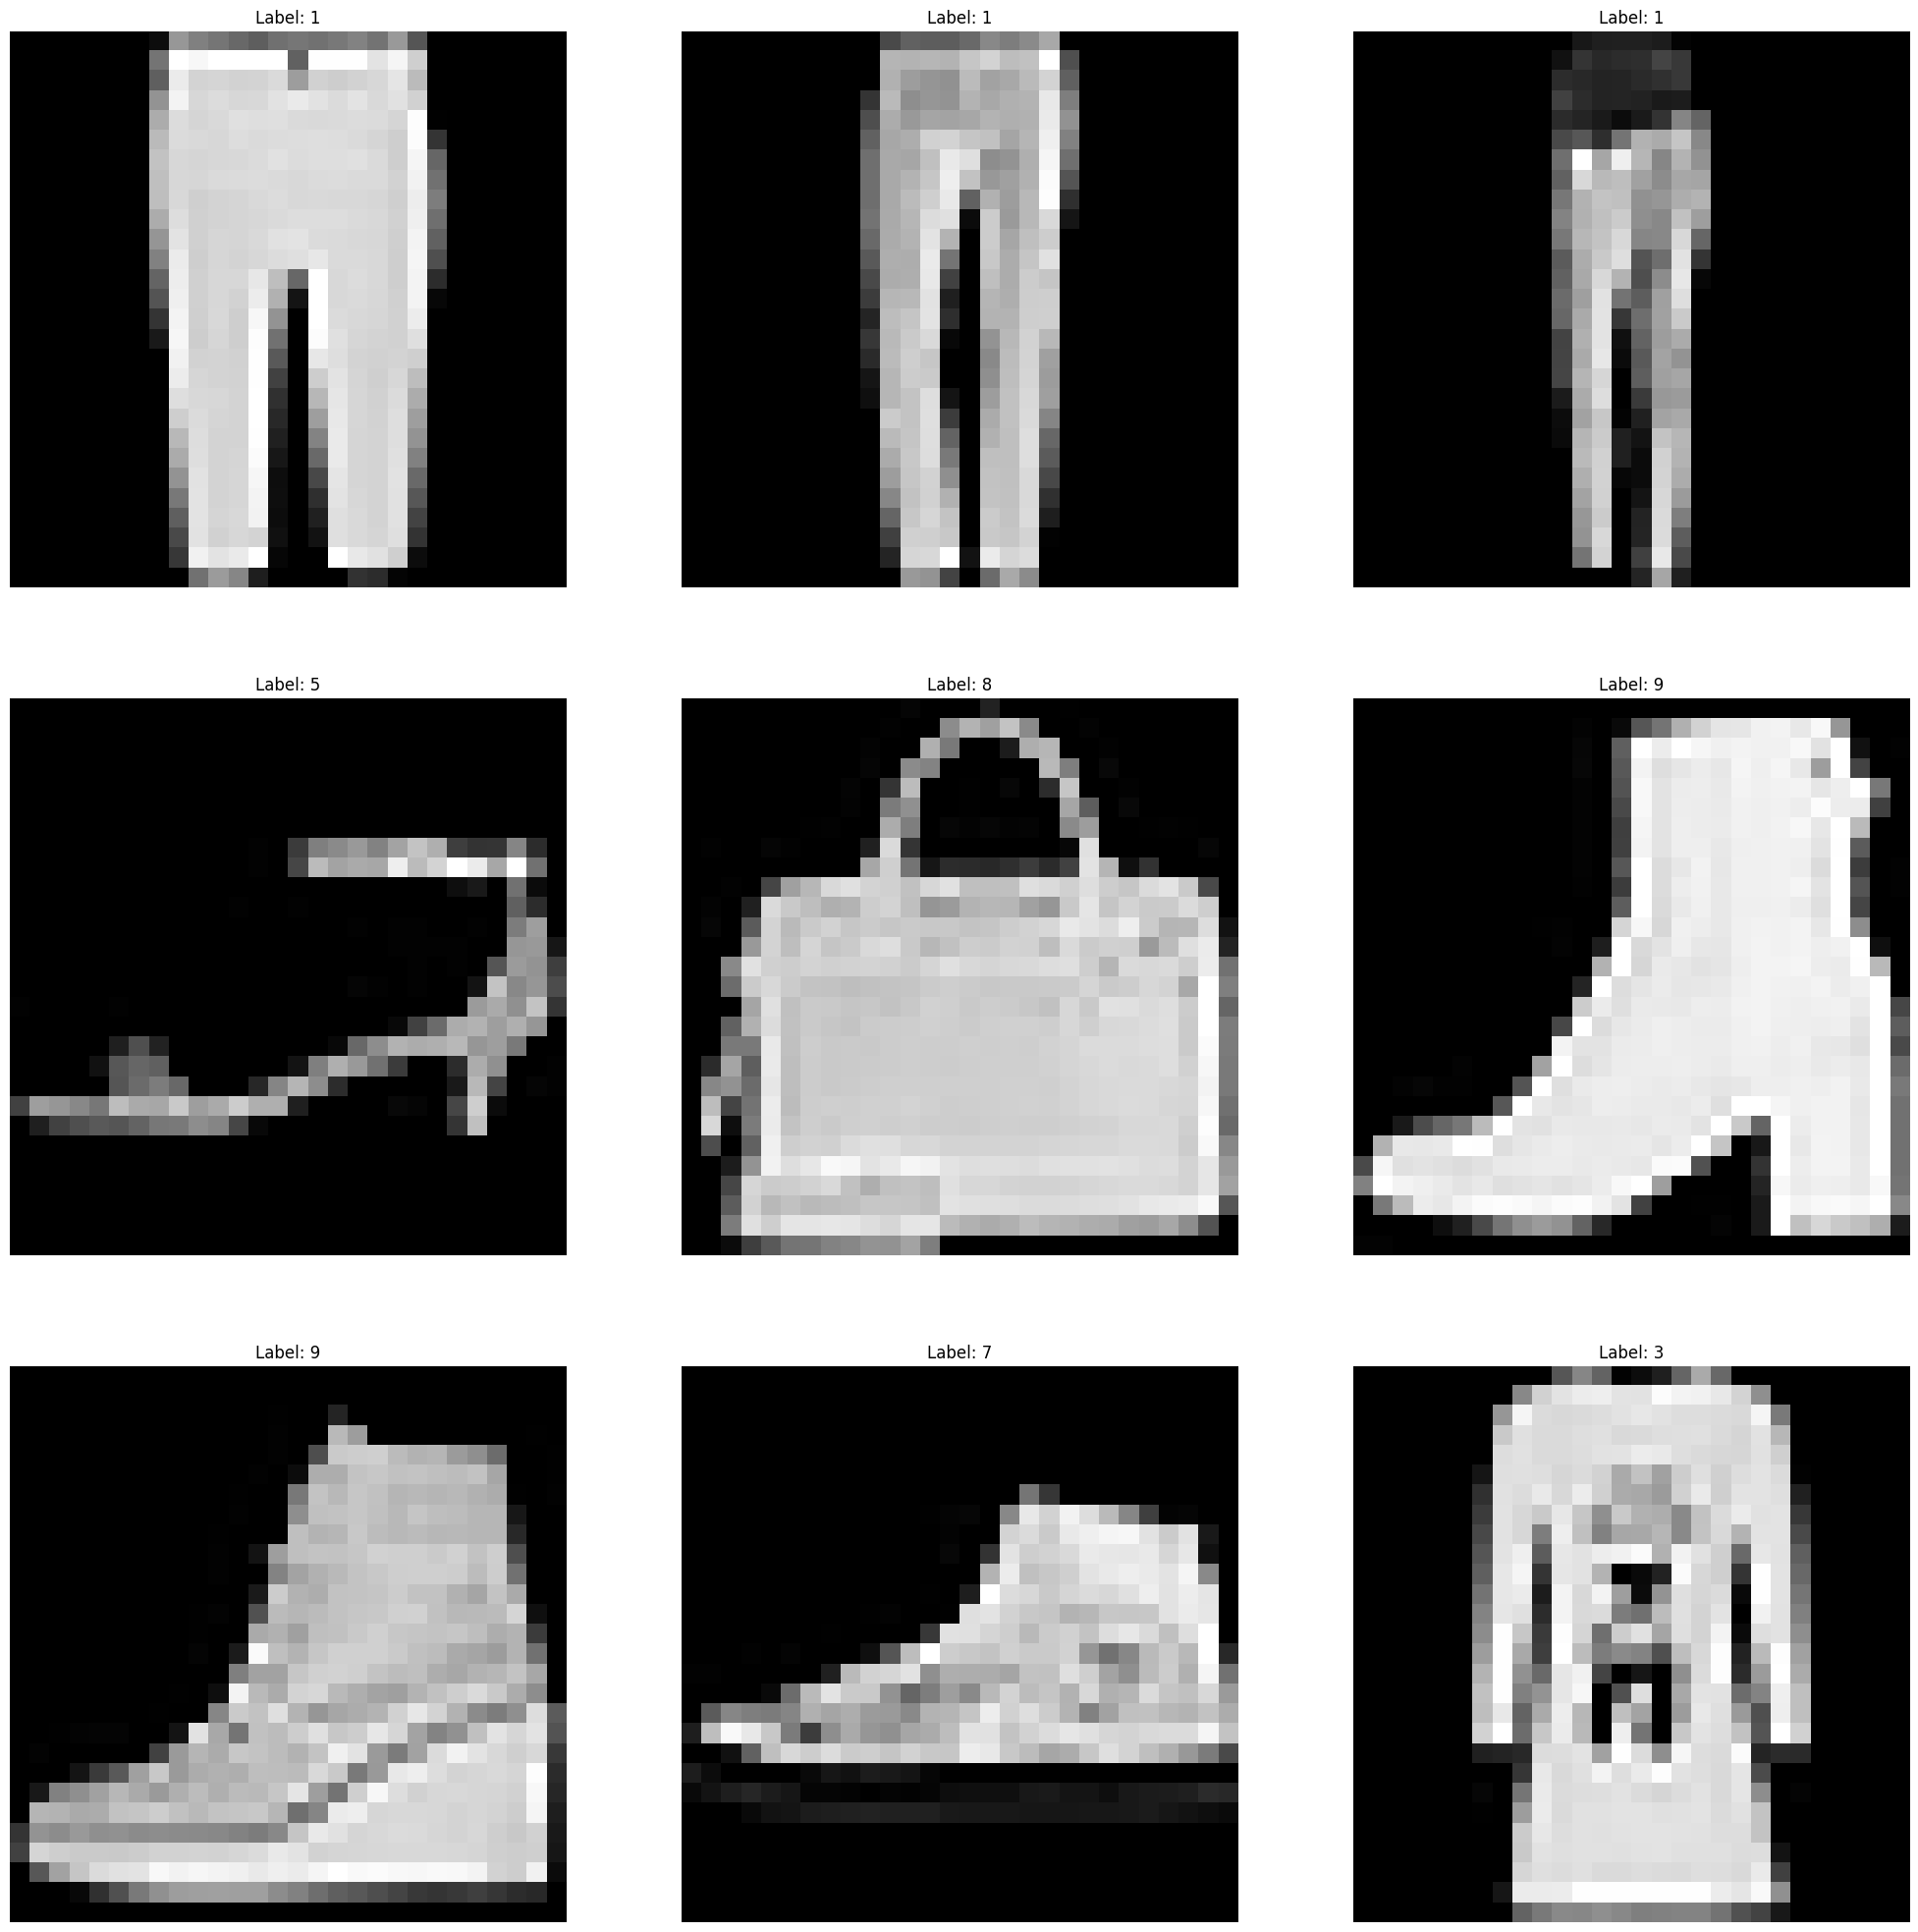

In [ ]:
#randomly print 9 images with label
#edit the 2 lines of the code snippet

import random
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(25,25))
for i in range(9):
    index = random.randint(0,len(X_train)-1) # showing the index_th image
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[index], cmap='gray')  #plotting  image
    plt.title(f"Label: {Y_train[index]}")  #adding lable as title
    plt.axis('off')  #removing axis tickss and labels

plt.show()



  
  


###These number denotes the respective object
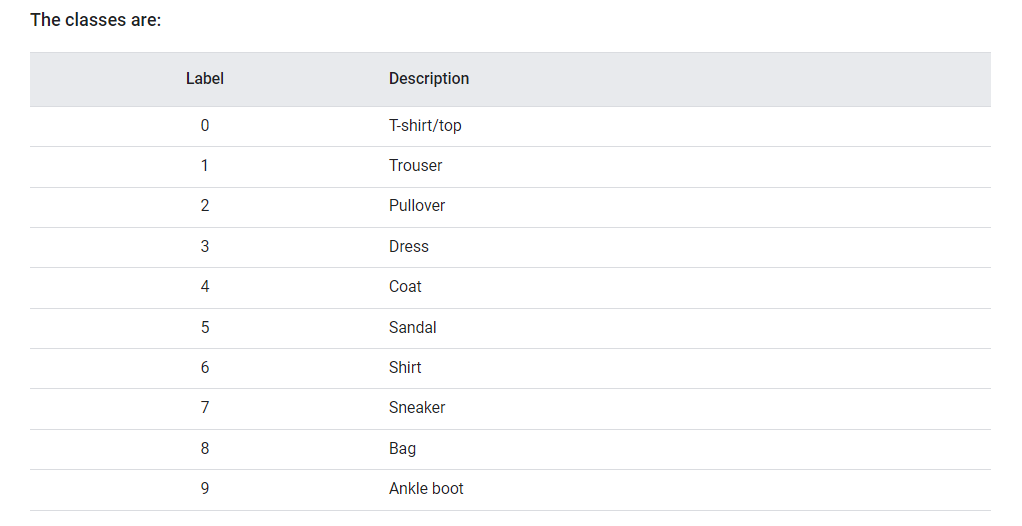

In [ ]:
# Find the count of each type of class

unique_classes, class_counts = np.unique(Y_train, return_counts=True)

for cls, count in zip(unique_classes, class_counts):
    class_label = {
        0: "T-shirt/top",
        1: "Trouser",
        2: "Pullover",
        3: "Dress",
        4: "Coat",
        5: "Sandal",
        6: "Shirt",
        7: "Sneaker",
        8: "Bag",
        9: "Ankle boot"
    }
    label = class_label[cls]
    print(f"Class: {cls} - {label}, Count: {count}")

Class: 0 - T-shirt/top, Count: 163
Class: 1 - Trouser, Count: 166
Class: 2 - Pullover, Count: 146
Class: 3 - Dress, Count: 166
Class: 4 - Coat, Count: 167
Class: 5 - Sandal, Count: 164
Class: 6 - Shirt, Count: 158
Class: 7 - Sneaker, Count: 164
Class: 8 - Bag, Count: 151
Class: 9 - Ankle boot, Count: 155


In [ ]:
# model initialization
model = tf.keras.Sequential()

# adding the 1st and 2nd layer layer 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))


#__add__ additional Intermediate Dense layers here to create the output
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))


#__output__layer with correct output shape and activation function[ google if finding this difficult to get]
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [ ]:
# Compiling the model
#add the lr and loss in the given space

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy()
                  ,metrics=['accuracy'])

In [ ]:
#Lets analyse the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


###What is the number of trainable parameters in the model?

In [ ]:
""" 
[objective] Write the answer here:
The model.summary() function is used to get the model's total number of trainable parameters.
No. of trainable parameters is included in description of model architecture pgiven by function. 

By using the model.summary() function, the model's summary,
which have details on each layer's input shape & no. of trainable parameters,
will be printed in the console. To get the total no. of trainable parameters in model,
look for "Total params" which is equal to 111,146
"""


' \n[objective] Write the answer here:\nThe model.summary() function is used to get the model\'s total number of trainable parameters.\nNo. of trainable parameters is included in description of model architecture pgiven by function. \n\nBy using the model.summary() function, the model\'s summary,\nwhich have details on each layer\'s input shape & no. of trainable parameters,\nwill be printed in the console. To get the total no. of trainable parameters in model,\nlook for "Total params" which is equal to 111,146\n'

In [ ]:
#lets train the model
#pass correct argument at the comment's place

history = model.fit(X_train, Y_train, epochs=5, validation_split=0.2)


Epoch 1/5
40/40 [==============================] - 1s 6ms/step - loss: 26.3930 - accuracy: 0.3758 - val_loss: 2.0946 - val_accuracy: 0.5094
Epoch 2/5
40/40 [==============================] - 0s 3ms/step - loss: 1.5091 - accuracy: 0.5609 - val_loss: 1.5274 - val_accuracy: 0.5844
Epoch 3/5
40/40 [==============================] - 0s 3ms/step - loss: 1.1248 - accuracy: 0.6211 - val_loss: 1.4382 - val_accuracy: 0.5813
Epoch 4/5
40/40 [==============================] - 0s 3ms/step - loss: 0.9294 - accuracy: 0.6773 - val_loss: 1.2742 - val_accuracy: 0.6594
Epoch 5/5
40/40 [==============================] - 0s 2ms/step - loss: 0.8389 - accuracy: 0.6891 - val_loss: 1.2281 - val_accuracy: 0.6250


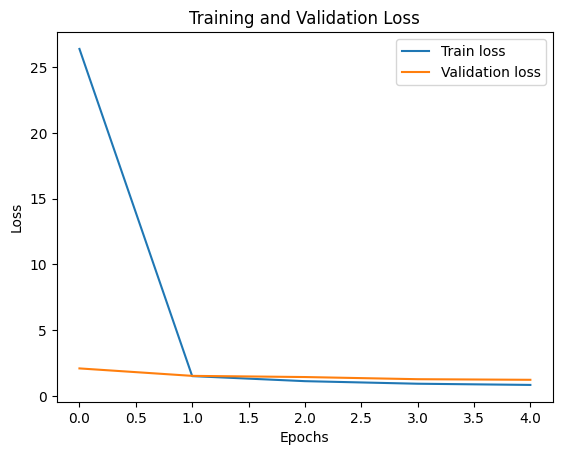

In [ ]:
#lets plot the losses

plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

###What do you infer from the graph of losses above?

In [ ]:
"""
[Under 100 words] Write your answer here:

I can see Overfitting:
If the training loss continues to decrease while the validation loss starts to increase or remains relatively high,
it indicate that model is overfitting.It occurs when the model performs well on the training data but
fails to generalize to new, unseen data. 
This can be observed if there is a significant gap between the training and validation loss curves
"""

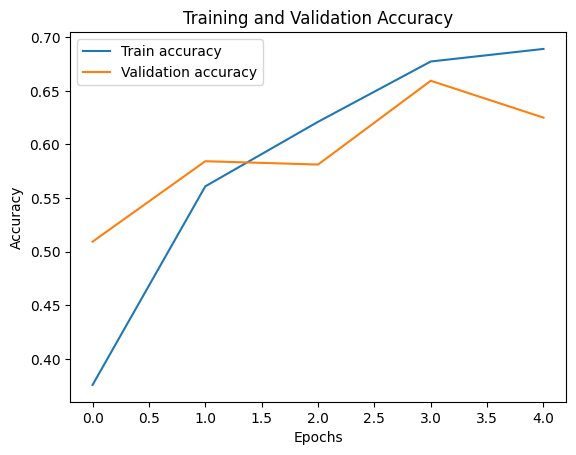

In [ ]:
#plotting the accuracy of the traing

plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

###What do you infer from the graph of accuracies above?

In [ ]:
"""
[Under 100 words] Write your answer here:
Model Performance: 
The training accuracy is consistently high and continues to improve while the validation accuracy also increases or remains relatively high,
it indicates that the model is performing well on both the training and validation data.
This suggests that the model has learned to generalize and can make accurate predictions on unseen data.

"""

In [ ]:
#Checking the prediction

Y_predicted = model.predict(X_test)

13/13 [==============================] - 0s 1ms/step


In [ ]:
# Calculate the R2score for the test data
from sklearn.metrics import r2_score

Y_predicted_xyz = np.argmax(Y_predicted, axis=1)

r2score = r2_score(Y_test, Y_predicted_xyz)
print("R2Score:", r2score)

R2Score: 0.5309054026960409


In [ ]:
# Let's see the kernel(weights) of the layers
model.layers[1].kernel.shape

In [ ]:
# print the shape of kernel of other layers as well
kernel_shape = model.layers[1].kernel.shape
print("Kernel shape:", kernel_shape)

Kernel shape: (784, 128)


In [ ]:
# Does that satisfied the matrix multiplication math discussed earlier

In [ ]:
"""No, 
by the kernel.shape attribute of layer does not directly provide the matrix multiplication math.
kernel.shape attribute returns the shape of the weights (kernels) in the specified layer, 
 but it cant provide actual weight.

To perform matrix multiplication,
we need to access the weights using the get_weights() method of layer and perform the matrix multiplication manually."""

